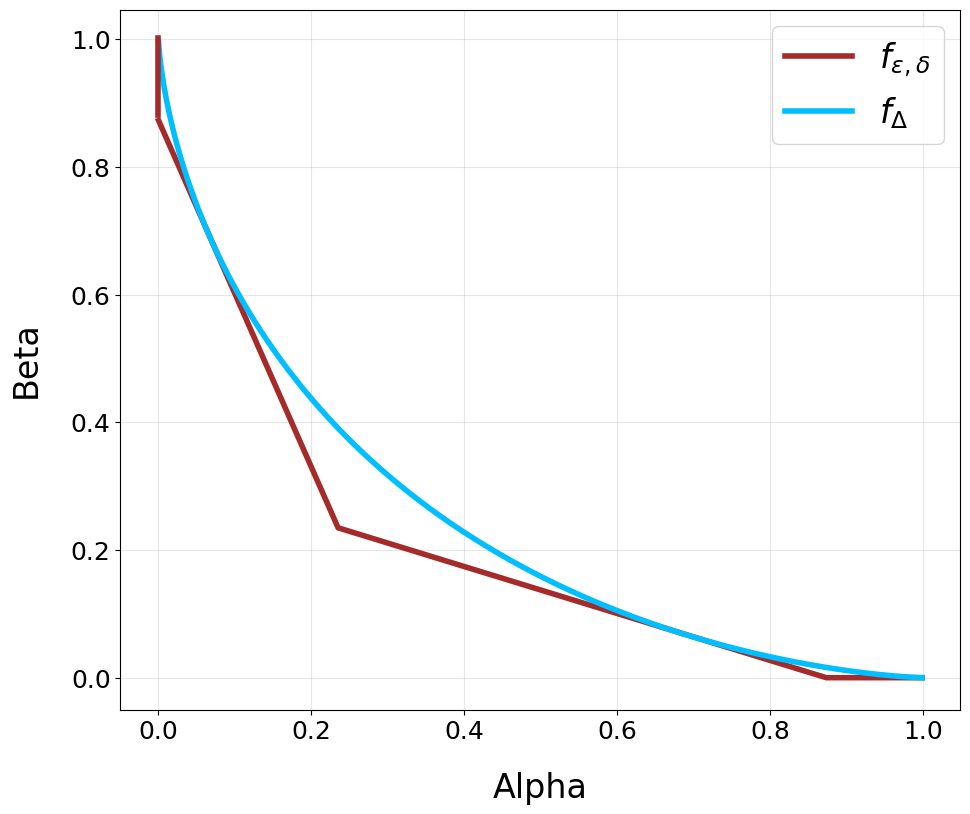

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

#--------------- Check tightness of f_eps_delta for Gaussian Curve ---------------------

sigma = 1
sens = 1
epsilon = 1

delta = norm.cdf(sens / (2 * sigma) - epsilon * sigma / sens) - np.exp(epsilon) * norm.cdf(-sens / (2 * sigma) - epsilon * sigma / sens)

def f_eps_delta(alpha):
    return np.maximum(np.maximum(0, 1 - delta - np.exp(epsilon) * alpha), np.exp(-epsilon) * (1 - delta - alpha))

# Generate alpha and beta for f_eps_delta
alpha = np.linspace(0.0001, 0.999, 10000)
beta_f_eps_delta = f_eps_delta(alpha)
f_eps_delta_points = pd.DataFrame({'alpha': alpha, 'beta': beta_f_eps_delta})

mu_1 = 0
mu_2 = 1

def Gaussian_curve(alpha):
    return norm.cdf(norm.ppf(1 - alpha) - mu_2)

# Generate alpha and beta for Gaussian curve
beta_gaussian_curve = [Gaussian_curve(a) for a in alpha]
Gaussian_curve_points = pd.DataFrame({'alpha': alpha, 'beta': beta_gaussian_curve})

# Plotting
plt.figure(figsize=(12, 10))  # Larger figure size
plt.plot(f_eps_delta_points["alpha"], f_eps_delta_points["beta"], color="brown", label=r"$f_{\varepsilon,\delta}$", linewidth=4)
plt.plot(Gaussian_curve_points['alpha'], Gaussian_curve_points['beta'], color="deepskyblue", label=r"$f_\Delta$", linewidth=4)

# Highlighting the segment
plt.axvline(x=0, ymin=0.85, ymax=0.96, color="brown", linewidth=4)

# Adjust tick font sizes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Labels and legend
plt.xlabel("Alpha", fontsize=24, labelpad=20)
plt.ylabel("Beta", fontsize=24, labelpad=20)
plt.legend(fontsize=24, loc='upper right', bbox_to_anchor=(1, 1), borderaxespad=0.5)

# Add tight layout and adjust padding
plt.tight_layout()  # Adjust layout
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)  # Custom margins for large fonts

# Save and show
plt.savefig("plot_oender_fixed.png", dpi=300, bbox_inches='tight')  # Save with tight bounding box
plt.grid(alpha=0.3)
plt.show()


In [9]:
print(1 - delta - np.exp(epsilon) * 0.25)
print(np.exp(-epsilon) * (1 - delta - 0.25))
print(f_eps_delta(np.array(0.25)))

0.1934928053785948
0.22921216482051152


TypeError: return arrays must be of ArrayType